In [41]:
# HIDDEN
from urllib.request import urlopen
import re 
#regular expressions, used to search for text within a string
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode()) #"utf8"
    # extract HTML from the web page
    #\\s表示 空格,回车,换行等空白符, [ \t\n\r\f\x] +号表示一个或多个的意思

# Read two books
huck_finn_url = "https://bitbucket.org/bakuzen/bsu-fds/raw/master/lec/huck_finn.txt"
huck_finn_text = read_url(huck_finn_url)
#print (huck_finn_text)

In [7]:
'''
re.sub() is short for substitute, to replace text in a string that matches a regular expression 
with new text. It behaves sort of like the .replace() string method.
'''
import re
string = "Tell me and I forget, teach me and I may remember, involve me and I <tag>."
output = re.sub("<.*?>", "LEARN", string)
print(output)

Tell me and I forget, teach me and I may remember, involve me and I LEARN.


In [42]:
'''
splits on "Chapter " + a sequence of numbers + a newline
re.IGNORECASE means it will split on "CHAPTER" or "chapter" or "Chapter" etc
split_text = re.split("Chapter [0-9]+\n", mytext, flags=re.IGNORECASE)
'''
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]
#print(huck_finn_chapters)

In [44]:
# Display the chapters of Huckleberry Finn in a table.
# pip install datascience 
from datascience import * 
Table().with_column('Chapters', huck_finn_chapters)  #with_column

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


In [20]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter.
import numpy as np
'''
numpy.char.count(a, sub, start=0, end=None)
Returns an array with the number of non-overlapping occurrences 
of substring sub in the range [start, end].
'''
counts = Table().with_columns([ #with_columns
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
])
# numpy.arange([start, ]stop, [step, ]dtype=None)
# Return evenly spaced values within a given interval.
# 43 chapters [1, 44]

NameError: name 'huck_finn_chapters' is not defined

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

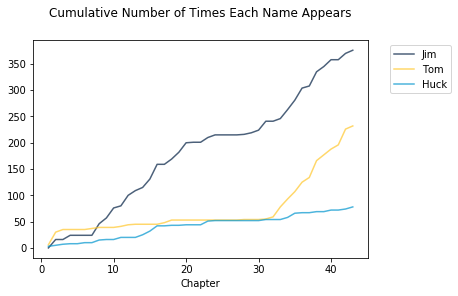

In [56]:
# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib
matplotlib.use('Agg', warn=False) #gui
#Line magics are prefixed with the % character
'''
With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
'''
%matplotlib inline
import matplotlib.pyplot as plots

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1,44,1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
'''
 Tom is hardly mentioned for much of the book until he arrives and joins Huck and Jim, 
 after Chapter 30. His curve and Jim's rise sharply at that point, as the action involving both of them intensifies. 
 As for Huck, his name hardly appears at all, because he is the narrator.
'''

In [43]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]
#print(little_women_chapters)

In [59]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [61]:
# Counts of names in the chapters of Little Women

counts=Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
])
print(counts)

Amy  | Beth | Jo   | Meg  | Laurie
23   | 26   | 44   | 26   | 0
13   | 12   | 21   | 20   | 0
2    | 2    | 62   | 36   | 16
14   | 18   | 34   | 17   | 0
6    | 14   | 55   | 13   | 35
6    | 28   | 13   | 5    | 9
27   | 5    | 9    | 5    | 7
48   | 9    | 71   | 16   | 17
3    | 5    | 21   | 71   | 24
5    | 5    | 12   | 4    | 4
... (37 rows omitted)


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

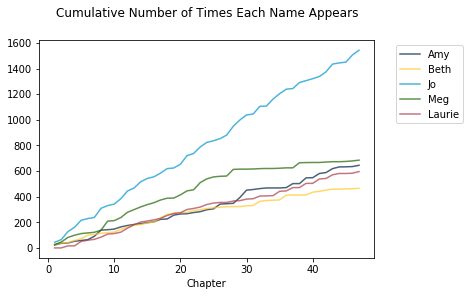

In [64]:
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1,48)) #(1, 48, 1)
# total 47 chapters
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [65]:
'''
Laurie is a young man who marries one of the girls in the end.
See if you can use the plots to guess which one.
=> Laurie married Jo
'''

'\nLaurie is a young man who marries one of the girls in the end.\nSee if you can use the plots to guess which one.\n=> Laurie married Jo\n'

In [70]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
       'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
       'Number of Periods', np.char.count(huck_finn_chapters, '.')
])
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [71]:
chars_periods_little_women = Table().with_columns([
       'Little Women Chapter Length', [len(s) for s in little_women_chapters],
       'Number of Periods', np.char.count(little_women_chapters, '.')
])
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


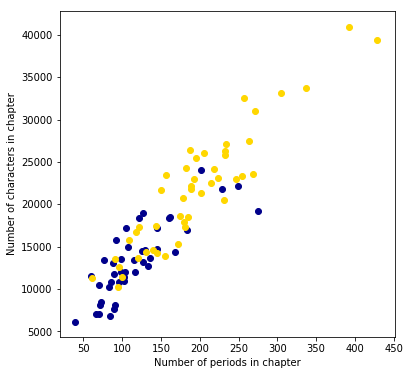

In [75]:
'''
The chapters of Little Women are in general longer than those of Huckleberry Finn
plot both sets of data on the same axes
'''
plots.figure(figsize=(6,6))
plots.scatter( chars_periods_huck_finn.column(1),
               chars_periods_huck_finn.column(0),
               color = 'darkblue')
plots.scatter( chars_periods_little_women.column(1),
               chars_periods_little_women.column(0),
               color = 'gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

In [76]:
'''
The plot shows us that many but not all of the chapters of Little Women 
are longer than those of Huckleberry Finn
the blue points are roughly clustered around a straight line, 
as are the yellow points.
it looks as though both colors of points might be clustered around 
the same straight line.
Now look at all the chapters that contain about 100 periods. 
The plot shows that those chapters contain about 10,000 characters to about 15,000 characters, roughly. 
That's about 100 to 150 characters per period.
It appears from looking at the plot that on average both books tend to have somewhere 
between 100 and 150 characters between periods, as a very rough estimate.
Perhaps these two great 19th century novels were signaling something so very familiar us now: 
the 140-character limit of Twitter.
'''

"\nThe plot shows us that many but not all of the chapters of Little Women \nare longer than those of Huckleberry Finn\nthe blue points are roughly clustered around a straight line, \nas are the yellow points.\nit looks as though both colors of points might be clustered around \nthe same straight line.\nNow look at all the chapters that contain about 100 periods. \nThe plot shows that those chapters contain about 10,000 characters to about 15,000 characters, roughly. \nThat's about 100 to 150 characters per period.\nIt appears from looking at the plot that on average both books tend to have somewhere \nbetween 100 and 150 characters between periods, as a very rough estimate.\nPerhaps these two great 19th century novels were signaling something so very familiar us now: \nthe 140-character limit of Twitter.\n"

In [80]:
[len(s) for s in little_women_chapters]

[21759,
 22148,
 20558,
 25526,
 23395,
 14622,
 14431,
 22476,
 33767,
 18508,
 23024,
 39363,
 18669,
 17924,
 17385,
 15353,
 13879,
 17432,
 17338,
 14252,
 23545,
 13708,
 23015,
 24239,
 13526,
 21739,
 15754,
 30992,
 26254,
 24137,
 20723,
 23158,
 25777,
 32496,
 21310,
 11441,
 23524,
 26091,
 27473,
 11368,
 26464,
 16753,
 33202,
 10289,
 12558,
 27094,
 40935]

In [1]:
# treatment, outcome, whether the treatment has an effect on the outcome
# association : a causal relation (causality) 
# First, an association is observed. Next, a more careful analysis leads to a decision about causality.
# comparison :treatment group, control group
# The death rate from cholera in the S&V houses was almost ten times the rate in the houses supplied by Lambeth.
# two groups were comparable to each other, apart from the treatment.
# two groups that were similar to each other in all but one aspect–their water supply
# confounding factor: An underlying difference between the two groups (other than the treatment) is called a confounding factor
# Coffee drinking was associated with lung cancer, but it did not cause the disease.

In [2]:
# Randomization: at random
# andomized controlled experiment = randomized controlled trial (RCT)
# blind experiment : in which individuals do not know whether they are in the treatment group or the control group. 
# placebo: give the control group a placebo, which is something that looks exactly like the treatment but in fact has no effect.
# conducting an observational study, not an experiment.
# observational study or experiment:  In an experiment, a treatment is applied to part of a population and responses are observed. The researcher in an experiment deliberately influences the responses. ... 
# The researcher in an observational study does not influence the responses.
# Random ≠ Haphazard
'''
John Snow conducted an observational study, not a randomized experiment. 
But he called his study a “grand experiment” because, as he wrote, 
“No fewer than three hundred thousand people … were divided into two groups 
without their choice, and in most cases, without their knowledge …”
Studies such as Snow’s are sometimes called “natural experiments.”
true randomization does not simply mean that the treatment and control groups are selected “without their choice.”
'''
# the rationale for random sampling may not require chance sampling—as long as our sample is representative,
# those statistical inferences may be reliable....say about such an outcome, 
# which is not at all unexpected, haphazard, or unpredictable

'\nJohn Snow conducted an observational study, not a randomized experiment. \nBut he called his study a “grand experiment” because, as he wrote, \n“No fewer than three hundred thousand people … were divided into two groups \nwithout their choice, and in most cases, without their knowledge …”\nStudies such as Snow’s are sometimes called “natural experiments.”\ntrue randomization does not simply mean that the treatment and control groups are selected “without their choice.”\n'

In [3]:
'''
The method of randomization can be as simple as tossing a coin
Every method of randomization consists of a sequence of carefully defined steps that allow chances to be specified mathematically. 
Main idea: to try to establish causality, run a randomized controlled experiment if possible. 
If you are conducting an observational study, you might be able to establish association but not causation. 
Be extremely careful about confounding factors before making conclusions about causality based on an observational study.
'''

'\nThe method of randomization can be as simple as tossing a coin\nEvery method of randomization consists of a sequence of carefully defined steps that allow chances to be specified mathematically. \nMain idea: to try to establish causality, run a randomized controlled experiment if possible. \nIf you are conducting an observational study, you might be able to establish association but not causation. \nBe extremely careful about confounding factors before making conclusions about causality based on an observational study.\n'

In [4]:
3*4

12

In [5]:
3**4

81

In [6]:
7/3

2.3333333333333335

In [7]:
7%3

1

In [8]:
1 + 2 * (3 * 4 * 5 / 6) ** 3 + 7 + 8 - 9 + 10

2017.0

In [9]:
#chartjunk
#low data-to-ink ratio
# horizontal axis of the graph is is not drawn to scale.

In [10]:
# In the period 1939 to 1963, the doctors' incomes went up from  3,262𝑡𝑜 25,050. So during that period the average increase in income per year was about $900.
(25050 - 3262)/(1963 - 1939)
# the doctors' incomes rise roughly linearly at a fairly steady rate. That rate is about $900, as we have just calculated.
# But in the period 1963 to 1976, the rate is more than three times as high:
(62799 - 25050)/(1976 - 1963)
# That is why the graph rises much more steeply after 1963.

2903.769230769231

In [11]:
# Some int values
2

2

In [12]:
# Some float values
1.2

1.2

In [13]:
3 / 1

3.0

In [14]:
# Very large or very small float values are displayed using scientific notation.
-12345678900000000000.0

-1.23456789e+19

In [15]:
1.5 + 2

3.5

In [16]:
#  If the result of a computation is a very large number, 
# then it is represented as infinite. 
# If the result is a very small number, then it is represented as zero.

2e306 * 10

2e+307

In [17]:
2e306 * 100

inf

In [18]:
2e-322 / 10

2e-323

In [19]:
2e-322 / 100

0.0

In [20]:
# an expression that involves numbers with more than 15 significant digits. 
# These extra digits are discarded before any arithmetic is carried out.
0.6666666666666666 - 0.6666666666666666123456789

0.0

In [21]:
2 ** 0.5

1.4142135623730951

In [22]:
#The third limit can be observed when taking the difference between two expressions 
#that should be equivalent. For example, the expression 2 ** 0.5 computes the square root of 2, 
#but squaring this value does not exactly recover 2.
(2 ** 0.5) * (2 ** 0.5)

2.0000000000000004

In [23]:
(2 ** 0.5) * (2 ** 0.5) - 2

4.440892098500626e-16

In [24]:
#The correct answer to this arithmetic expression is 0, 
#but a small error in the final significant digit appears very different in scientific notation. 
#This behavior appears in almost all programming languages because it is the result of the standard way that arithmetic is carried out on computers.

In [25]:
purchase_price = 5
state_tax_rate = 0.075
county_tax_rate = 0.02
city_tax_rate = 0
sales_tax_rate = state_tax_rate + county_tax_rate + city_tax_rate
sales_tax = purchase_price * sales_tax_rate
sales_tax

0.475

In [1]:
# growth rate
initial = 2766000
changed = 2814000
(changed - initial) / initial

0.01735357917570499

In [2]:
(changed/initial) - 1

0.017353579175704903

In [4]:
# A useful property of growth rates is that they don't change even if the values are expressed in different units
initial = 2766
changed = 2814
(changed/initial) - 1
# In 10 years, the number of employees of the US Federal Government has increased by only 1.74%.
# In that time, the total expenditures of the US Federal Government increased from $2.37 trillion to $3.38 trillion in 2012.
initial = 2.37
changed = 3.38
(changed/initial) - 1

0.4261603375527425

In [5]:
# A 42.6% increase in the federal budget is much larger than the 1.74% increase in federal employees. 
# In fact, the number of federal employees has grown much more slowly than the population of the United States,
# which increased 9.21% in the same time period from 287.6 million people in 2002 to 314.1 million in 2012.
initial = 287.6
changed = 314.1
(changed/initial) - 1

0.09214186369958277

In [6]:
# the number of manufacturing jobs in the US decreased from 15.3 million in 2002 to 11.9 million in 2012, a -22.2% growth rate.
initial = 15.3
changed = 11.9
(changed/initial) - 1

-0.2222222222222222

In [8]:
# annual growth rate is a growth rate of some quantity over a single year. 
# An annual growth rate of 0.035, accumulated each year for 10 years, 
# gives a much larger ten-year growth rate of 0.41 (or 41%).
annual_growth_rate = 0.035
ten_year_growth_rate = (1 + annual_growth_rate) ** 10 - 1
ten_year_growth_rate

0.410598760621121

In [9]:
# a ten-year growth rate can be used to compute an equivalent annual growth rate. 
# computes the annual growth rate of federal expenditures over the last 10 years.
initial = 2.37
changed = 3.38
t = 10
(changed/initial)**(1/t) -1 
# The total growth over 10 years is equivalent to a 3.6% increase each year.

0.03613617208346853

In [10]:
# changed = initial * (1 + g) ** t
# g = (changed/initial) ** (1/t) - 1

In [11]:
abs(-12)

12

In [12]:
round(5 - 1.3)

4

In [13]:
max(2, 2 + 3, 4)

5

In [14]:
import math
import operator
math.sqrt(operator.add(4, 5))

3.0

In [15]:
(4 + 5) ** 0.5

3.0

In [16]:
# percent difference
# in 2014 Florida farms produced 2.72 billion eggs while Iowa farms produced 16.25 billion eggs
florida = 2.72
iowa = 16.25
100*abs(florida-iowa)/((florida+iowa)/2)

142.6462836056932

In [31]:
import math
#math.log.__doc__
math.log?

In [4]:
import math
math.log(16, 2)

4.0

In [5]:
math.log(16)/math.log(2)

4.0

In [6]:
# In this table the biggest change in the number of men between two consecutive locations is 
# when the retreat begins at Moscow, as is the biggest percentage change.
# It is worth noting that bigger absolute changes don't always correspond to bigger percentage changes.
'''
systematic difference is when something is done differently with a fixed plan so you know exactly how and why it is different. 
Vs. difference could mean many things and the experimenter may not know the reason for the difference.
'''

'\nsystematic difference is when something is done differently with a fixed plan so you know exactly how and why it is different. \nVs. difference could mean many things and the experimenter may not know the reason for the difference.\n'

In [7]:
"data" + "science"

'datascience'

In [8]:
# Double quotes are often preferred because they allow you to include apostrophes inside of strings
"This won't work with a single-quoted string!"

"This won't work with a single-quoted string!"

In [9]:
"That's " + str(1 + 1) + ' ' + str(True)

"That's 2 True"

In [10]:
"loud".upper()

'LOUD'

In [11]:
'hitchhiker'.replace('hi', 'ma')

'matchmaker'

In [12]:
# Note that the line t = s.replace('t', 'ing') doesn't change the string s, which is still "train". 
s = "train"
t = s.replace('t', 'ing')
u = t.replace('in', 'de')
u

'degrade'

In [13]:
3 > 1 + 1

True

In [14]:
1 < 1 + 1 < 3

True

In [15]:
x = 12
y = 5
min(x, y) <= (x+y)/2 <= max(x, y)

True

In [16]:
# A shorter string is less than a longer string that begins with the shorter string.
"Dog" > "Cup"> "Catastrophe" > "Cat"

True

In [17]:
# np.array
dir([])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [18]:
list = [x*10 for x in range(10)] 
list

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [19]:
# HIDDEN
from datascience import *
# Calling the function make_array on several values places them into an array
baseline_high = 14.48
highs = make_array(baseline_high - 0.880, baseline_high - 0.093,
                   baseline_high + 0.105, baseline_high + 0.684)
highs

array([13.6  , 14.387, 14.585, 15.164])

In [20]:
sum(highs)/len(highs)

14.434000000000001

In [21]:
# Arrays can also contain strings or other types of values, but a single array can only contain a single kind of data. 
english_parts_of_speech = make_array("noun", "pronoun", "verb", "adverb", "adjective", "conjunction", "preposition", "interjection")
english_parts_of_speech
# <U12 stores them flat, zero-padding each entry to length 12

array(['noun', 'pronoun', 'verb', 'adverb', 'adjective', 'conjunction',
       'preposition', 'interjection'], dtype='<U12')

In [22]:
# convert all of these temperatures to Fahrenheit
highs * (9/5) + 32

array([56.48  , 57.8966, 58.253 , 59.2952])

In [23]:
highs.size

4

In [24]:
highs.sum()

57.736000000000004

In [25]:
highs.mean()

14.434000000000001

In [26]:
import numpy as np
# the diff function computes the difference between each adjacent pair of elements in an array. 
# The first element of the diff is the second element minus the first.
np.diff(highs)

array([0.787, 0.198, 0.579])

In [27]:
# Numpy reference
'''
Each of these functions takes an array as an argument and returns a single value.
np.prod  Multiply all elements together
np.sum  Add all elements together
np.all Test whether all elements are true values (non-zero numbers are true)
np.any Test whether any elements are true values (non-zero numbers are true)
np.count_nonzero  Count the number of non-zero elements

Each of these functions takes an array as an argument and returns an array of values.
np.diff Difference between adjacent elements
np.round Round each number to the nearest integer (whole number)
np.cumprod A cumulative product: for each element, multiply all elements so far
np.cumsum  A cumulative sum: for each element, add all elements so far
np.exp Exponentiate each element
np.log Take the natural logarithm of each element
np.sqrt Take the square root of each element
np.sort Sort the elements

Each of these functions takes an array of strings and returns an array.
np.char.lower Lowercase each element
np.char.upper Uppercase each element
np.char.strip Remove spaces at the beginning or end of each element
np.char.isalpha Whether each element is only letters (no numbers or symbols)
np.char.isnumeric Whether each element is only numeric (no letters)

Each of these functions takes both an array of strings and a search string; each returns an array.
np.char.count Count the number of times a search string appears among the elements of an array
np.char.find The position within each element that a search string is found first
np.char.rfind The position within each element that a search string is found last
np.char.startswith Whether each element starts with the search string
'''

'\nEach of these functions takes an array as an argument and returns a single value.\nnp.prod  Multiply all elements together\nnp.sum  Add all elements together\nnp.all Test whether all elements are true values (non-zero numbers are true)\nnp.any Test whether any elements are true values (non-zero numbers are true)\nnp.count_nonzero  Count the number of non-zero elements\n\nEach of these functions takes an array as an argument and returns an array of values.\nnp.diff Difference between adjacent elements\nnp.round Round each number to the nearest integer (whole number)\nnp.cumprod A cumulative product: for each element, multiply all elements so far\nnp.cumsum  A cumulative sum: for each element, add all elements so far\nnp.exp Exponentiate each element\nnp.log Take the natural logarithm of each element\nnp.sqrt Take the square root of each element\nnp.sort Sort the elements\n\nEach of these functions takes an array of strings and returns an array.\nnp.char.lower Lowercase each element\n

In [28]:
# np.exp() The exponential function is e^x
np.exp(np.arange(10))

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [29]:
# np.arange function, which takes either one, two, or three arguments: a start, and end, and a 'step'.
# If you pass one argument to np.arange, this becomes the end value, with start=0, step=1
np.arange(5)

array([0, 1, 2, 3, 4])

In [30]:
np.arange(3, 9)

array([3, 4, 5, 6, 7, 8])

In [31]:
np.arange(3, 30, 5)

array([ 3,  8, 13, 18, 23, 28])

In [32]:
np.arange(1.5, -2, -0.5) 

array([ 1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5])

In [33]:
positive_term_denominators = np.arange(1, 10000, 4)
positive_term_denominators
positive_terms = 1 / positive_term_denominators
positive_terms

array([1.00000000e+00, 2.00000000e-01, 1.11111111e-01, ...,
       1.00110121e-04, 1.00070049e-04, 1.00030009e-04])

In [34]:
negative_terms = 1 / (positive_term_denominators + 2)
negative_terms

array([3.33333333e-01, 1.42857143e-01, 9.09090909e-02, ...,
       1.00090081e-04, 1.00050025e-04, 1.00010001e-04])

In [35]:
4 * ( sum(positive_terms) - sum(negative_terms) )

3.1413926535917955

In [36]:
# If two arrays are of the same size, Python makes it easy to do calculations involving both arrays.
baseline_low = 3.00
lows = make_array(baseline_low - 0.872, baseline_low - 0.629,
                  baseline_low - 0.126, baseline_low + 0.728)
lows

array([2.128, 2.371, 2.874, 3.728])

In [37]:
# the average daily range of temperatures for each decade.
'''
make_array(
    highs.item(0) - lows.item(0),
    highs.item(1) - lows.item(1),
    highs.item(2) - lows.item(2),
    highs.item(3) - lows.item(3)
)
'''
# As when we converted an array of temperatures from Celsius to Fahrenheit,
# Python provides a much cleaner way to write this
highs - lows

array([11.472, 12.016, 11.711, 11.436])

In [38]:
even = np.arange(2, 1000001, 2)
one_below_even = even - 1
one_above_even = even + 1
2 * np.prod(even/one_below_even) * np.prod(even/one_above_even)

3.1415910827951143

In [16]:
# HIDDEN
import numpy as np
np.set_printoptions(threshold=50)
from datascience import *
Table()

In [40]:
Table().with_columns('Number of petals', make_array(8,34,5))

Number of petals
8
34
5


In [41]:
#To add two (or more) new columns, provide the labe and array for each column. 
#All columns must have the same length, or an error will occur.
Table().with_columns(
    'Number of petals', make_array(8,34,5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [42]:
#we can give this table a name, and then extend the table with another column.
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)
flowers.with_columns(
    'Color', make_array('pink', 'yellow', 'red')
)

Number of petals,Name,Color
8,lotus,pink
34,sunflower,yellow
5,rose,red


In [43]:
#The with_columns method creates a new table each time it is called, 
#so the original table is not affected
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [17]:
from datascience import * 
# use the Table method read_table to read a CSV file 
minard = Table.read_table('minard.csv')
minard

Longitude,Latitude,City Name,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [18]:
minard.num_columns

6

In [19]:
minard.num_rows

8

In [20]:
minard.labels

('Longitude',
 'Latitude',
 'City Name',
 'Direction',
 'Survivors',
 'Percent Surviving')

In [21]:
# relabeled method creates a new table and leaves minard unchanged.
minard.relabeled('City Name', 'City')

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [22]:
minard

Longitude,Latitude,City Name,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [23]:
#A common pattern is to assign the original name minard to the new table, so that all future uses of minard will refer to the relabeled table.
minard = minard.relabeled('City Name', 'City')
minard

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [24]:
minard.column('Survivors')

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [25]:
minard.column(4)

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [26]:
# The items in the column can be accessed using item, as with any array
minard.column(4).item(0)

145000

In [32]:
initial = minard.column('Survivors').item(0)
minard = minard.with_columns(
    'Percent Surviving', minard.column('Survivors')/initial
)
minard

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,1
33.2,54.9,Dorogobouge,Advance,140000,0.965517
34.4,55.5,Chjat,Advance,127100,0.876552
37.6,55.8,Moscou,Advance,100000,0.689655
34.3,55.2,Wixma,Retreat,55000,0.37931
32,54.6,Smolensk,Retreat,24000,0.165517
30.4,54.4,Orscha,Retreat,20000,0.137931
26.8,54.3,Moiodexno,Retreat,12000,0.0827586


In [33]:
# The set_format method takes Formatter objects, which exist for dates (DateFormatter), 
# currencies (CurrencyFormatter), numbers, and percentages.
minard.set_format('Percent Surviving', PercentFormatter)

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [34]:
#The method select creates a new table that contains only the specified columns
minard.select('Longitude', 'Latitude')

Longitude,Latitude
32,54.8
33.2,54.9
34.4,55.5
37.6,55.8
34.3,55.2
32,54.6
30.4,54.4
26.8,54.3


In [35]:
# The same selection can be made using column indices instead of labels.
minard.select(0,1)

Longitude,Latitude
32,54.8
33.2,54.9
34.4,55.5
37.6,55.8
34.3,55.2
32,54.6
30.4,54.4
26.8,54.3


In [36]:
#The result of using select is a new table, even when you select just one column
minard.select("Survivors")
#Notice that the result is a table, unlike the result of column, which is an array

Survivors
145000
140000
127100
100000
55000
24000
20000
12000


In [37]:
minard.column("Survivors")

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [38]:
#Another way to create a new table consisting of a set of columns is to drop the columns you don't want.
minard.drop("Longitude","Latitude","Direction")

City,Survivors,Percent Surviving
Smolensk,145000,100.00%
Dorogobouge,140000,96.55%
Chjat,127100,87.66%
Moscou,100000,68.97%
Wixma,55000,37.93%
Smolensk,24000,16.55%
Orscha,20000,13.79%
Moiodexno,12000,8.28%


In [39]:
# Neither select nor drop change the original table. Instead, they create new smaller tables that share the same data. 
# The fact that the original table is preserved is useful! 
# You can generate multiple different tables that only consider certain columns without worrying that one analysis will affect the other.
minard

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [15]:
#####  Sorting rows #####
# This table can be found online: https://www.statcrunch.com/app/index.php?dataid=1843341
from datascience import *
nba_salaries = Table.read_table('nba_salaries.csv')
nba_salaries


PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [3]:
nba_salaries.show(3)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625


In [4]:
#The argument to sort method is a column label or index.
nba_salaries.sort('PLAYER').show(5)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12


In [5]:
nba = nba_salaries.relabeled("2015-2016 SALARY", 'SALARY')
nba.sort('SALARY')

PLAYER,POSITION,TEAM,SALARY
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Jordan McRae,SG,Phoenix Suns,0.049709
Cory Jefferson,PF,Phoenix Suns,0.049709
Elliot Williams,SG,Memphis Grizzlies,0.055722
Orlando Johnson,SG,Phoenix Suns,0.055722
Phil Pressey,PG,Phoenix Suns,0.055722
Keith Appling,PG,Orlando Magic,0.061776
Sean Kilpatrick,SG,Denver Nuggets,0.099418
Erick Green,PG,Utah Jazz,0.099418
Jeff Ayres,PF,Los Angeles Clippers,0.111444


In [8]:
# These figures are somewhat difficult to compare as some of these players changed teams during the season 
# and received salaries from more than one team; only the salary from the last team appears in the table
nba.sort('SALARY', descending=True)

PLAYER,POSITION,TEAM,SALARY
nan,nan,nan,nan
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931


In [9]:
help(nba.sort)
# sort(column_or_label, descending=False, distinct=False)

Help on method sort in module datascience.tables:

sort(column_or_label, descending=False, distinct=False) method of datascience.tables.Table instance
    Return a Table of rows sorted according to the values in a column.
    
    Args:
        ``column_or_label``: the column whose values are used for sorting.
    
        ``descending``: if True, sorting will be in descending, rather than
            ascending order.
    
        ``distinct``: if True, repeated values in ``column_or_label`` will
            be omitted.
    
    Returns:
        An instance of ``Table`` containing rows sorted based on the values
        in ``column_or_label``.
    
    >>> marbles = Table().with_columns(
    ...    "Color", make_array("Red", "Green", "Blue", "Red", "Green", "Green"),
    ...    "Shape", make_array("Round", "Rectangular", "Rectangular", "Round", "Rectangular", "Round"),
    ...    "Amount", make_array(4, 6, 12, 7, 9, 2),
    ...    "Price", make_array(1.30, 1.30, 2.00, 1.75, 1.40, 1.00)

In [16]:
# the following three calls do exactly the same thing.
# nba.sort('SALARY', True)
# nba.sort('SALARY', descending=True)
 nba.sort(column_or_label='SALARY', descending=True)
# it's a useful convention to include the argument name 

PLAYER,POSITION,TEAM,SALARY
nan,nan,nan,nan
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931


In [17]:
# The Table method "take" a specified set of rows.
nba_salaries

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [18]:
nba_salaries.take(0)
# This is a new table with just the single row that we specified.

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


In [21]:
nba_salaries.take(np.arange(3, 6))

PLAYER,POSITION,TEAM,2015-2016 SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4


In [22]:
# a table of the top 5 highest paid players
nba.sort('SALARY', descending=True).take(np.arange(5))

PLAYER,POSITION,TEAM,SALARY
nan,nan,nan,nan
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875


In [24]:
 # all those who earned more than  $10  million.
nba.where('SALARY', are.above(10))
# are.above(10) ensured that each selected row had a value of SALARY that was greater than 10.

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Joe Johnson,SF,Brooklyn Nets,24.8949
Thaddeus Young,PF,Brooklyn Nets,11.236
Al Jefferson,C,Charlotte Hornets,13.5
Nicolas Batum,SG,Charlotte Hornets,13.1253
Kemba Walker,PG,Charlotte Hornets,12
Derrick Rose,PG,Chicago Bulls,20.0931
Jimmy Butler,SG,Chicago Bulls,16.4075
Joakim Noah,C,Chicago Bulls,13.4


In [25]:
nba.where('SALARY', are.above(10)).sort('SALARY')
# DeMar DeRozan of the Toronto Raptors was the "poorest" of this group, at a salary of just over  10  million dollars.

PLAYER,POSITION,TEAM,SALARY
DeMar DeRozan,SG,Toronto Raptors,10.05
Gerald Wallace,SF,Philadelphia 76ers,10.1059
Luol Deng,SF,Miami Heat,10.1516
Monta Ellis,SG,Indiana Pacers,10.3
Wilson Chandler,SF,Denver Nuggets,10.4494
Brendan Haywood,C,Cleveland Cavaliers,10.5225
Jrue Holiday,PG,New Orleans Pelicans,10.5955
Tyreke Evans,SG,New Orleans Pelicans,10.7346
Marcin Gortat,C,Washington Wizards,11.2174
Thaddeus Young,PF,Brooklyn Nets,11.236


In [27]:
nba.where('PLAYER', are.equal_to('Stephen Curry'))

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708
